In [ ]:
import numpy as np
import pandas as pd
from scipy import signal

def simulate_arima(model, n, rand_gen=np.random.normal, innov=None, n_start=None, start_innov=None):
    if not isinstance(model, dict):
        raise ValueError("'model' must be dict")
    if n <= 0:
        raise ValueError("'n' must be strictly positive")

    p = len(model.get('ar', []))
    q = len(model.get('ma', []))
    if n_start is None:
        n_start = max(p, q)

    d = model.get('order', [0, 0, 0])[1]
    if d != round(d) or d < 0:
        raise ValueError("number of differences must be a positive integer")

    if start_innov is not None and len(start_innov) < n_start:
        raise ValueError("'start.innov' is too short: need %d points" % n_start)

    if innov is None:
        innov = rand_gen(size=n)
    if start_innov is None:
        start_innov = rand_gen(size=n_start)

    x = np.concatenate([start_innov, innov[:n]])
    if q:
        x = signal.lfilter([1, *model['ma']], [1], x)
        x[:q] = 0
    if p:
        x = signal.lfilter([1], [1, *-np.array(model['ar'])], x)
    if n_start > 0:
        x = x[n_start:]
    if d > 0:
        x = pd.Series(x).diff(d).dropna().values

    return pd.Series(x)

##**Intuitive Understandings of the ARIMA model**



### First-order ARIMA

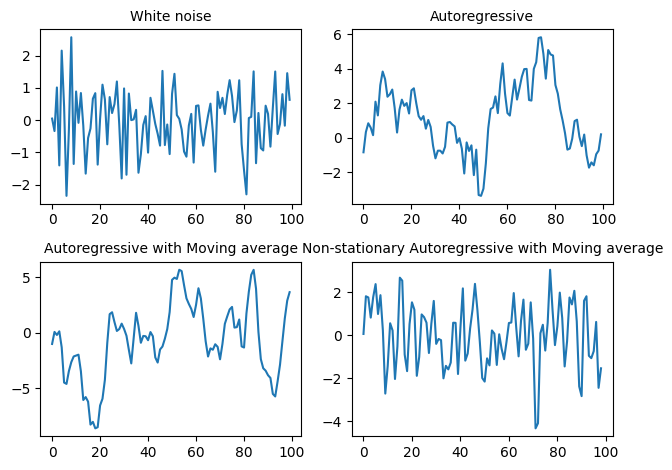

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(123)

# White noise
model = {'order': [0, 0, 0]}
n = 100
x = simulate_arima(model, n)
plt.subplot(2, 2, 1)
plt.plot(x)
plt.title('White noise', fontsize=10)

# Autoregressive
model = {'order': [1, 0, 0], 'ar': [0.9]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 2)
plt.plot(x)
plt.title('Autoregressive', fontsize=10)

# Autoregressive with Moving average
model = {'order': [1, 0, 1], 'ar': [0.9], 'ma': [0.9]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 3)
plt.plot(x)
plt.title('Autoregressive with Moving average', fontsize=10)

# Non-stationary Autoregressive with Moving average
model = {'order': [1, 1, 1], 'ar': [0.9], 'ma': [0.9]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 4)
plt.plot(x)
plt.title('Non-stationary Autoregressive with Moving average', fontsize=10)

plt.tight_layout()
plt.show()

### Effect of Coefficients

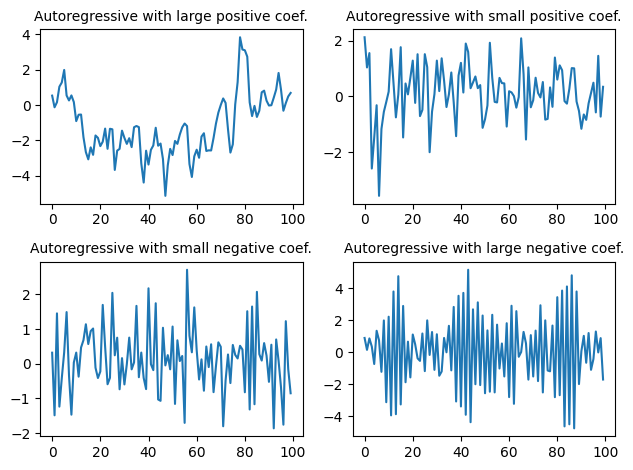

In [ ]:
# Autoregressive with large positive coef.
model = {'order': [1, 0, 0], 'ar': [0.9]}
n = 100
x = simulate_arima(model, n)
plt.subplot(2, 2, 1)
plt.plot(x)
plt.title('Autoregressive with large positive coef.', fontsize=10)

# Autoregressive with small positive coef.
model = {'order': [1, 0, 0], 'ar': [0.2]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 2)
plt.plot(x)
plt.title('Autoregressive with small positive coef.', fontsize=10)

# Autoregressive with small negative coef.
model = {'order': [1, 0, 0], 'ar': [-0.2]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 3)
plt.plot(x)
plt.title('Autoregressive with small negative coef.', fontsize=10)

# Autoregressive with large negative coef.
model = {'order': [1, 0, 0], 'ar': [-0.9]}
x = simulate_arima(model, n)
plt.subplot(2, 2, 4)
plt.plot(x)
plt.title('Autoregressive with large negative coef.', fontsize=10)

plt.tight_layout()
plt.show()

### Random Walk

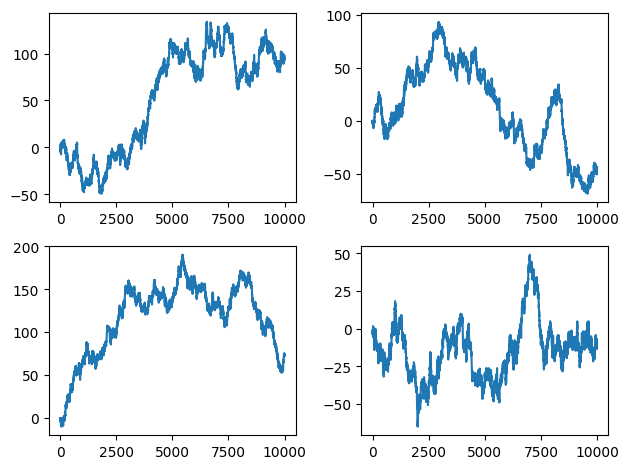

In [ ]:
model = {'order': [1, 0, 0], 'ar': [0.999999]}
n = 10000

np.random.seed(123)
x = simulate_arima(model, n)
plt.subplot(2, 2, 1)
plt.plot(x)

np.random.seed(124)
x = simulate_arima(model, n)
plt.subplot(2, 2, 2)
plt.plot(x)

np.random.seed(125)
x = simulate_arima(model, n)
plt.subplot(2, 2, 3)
plt.plot(x)

np.random.seed(126)
x = simulate_arima(model, n)
plt.subplot(2, 2, 4)
plt.plot(x)

plt.tight_layout()
plt.show()

### Autocorrelation Function (ACF) and partial Autocorrelation Function (PACF)

<Figure size 1200x400 with 0 Axes>

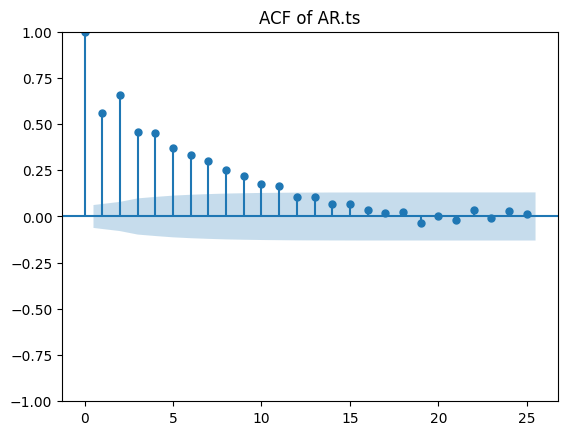

<Figure size 1200x400 with 0 Axes>

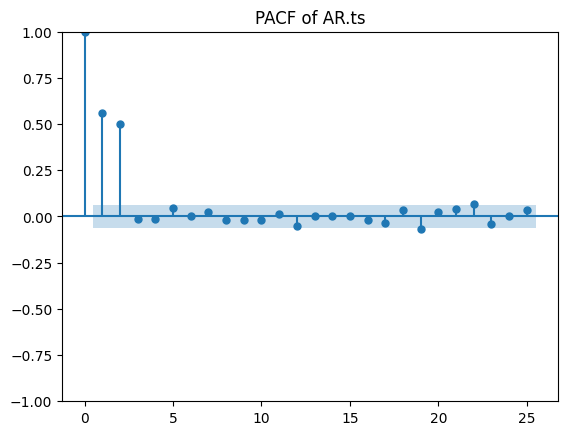

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate the time series
n = 1000
AR_ts = simulate_arima({'order': [2, 0, 0], 'ar': [0.3, 0.5]}, n)
MA_ts = simulate_arima({'order': [0, 0, 2], 'ma': [0.7, 0.8]}, n)
ARMA_ts = simulate_arima({'order': [2, 0, 2], 'ar': [0.3, 0.5], 'ma': [0.7, 0.8]}, n)

# Plot the ACF and PACF of AR.ts
plt.figure(figsize=(12, 4))
plot_acf(AR_ts, lags=25)
plt.title('ACF of AR.ts')

plt.figure(figsize=(12, 4))
plot_pacf(AR_ts, lags=25)
plt.title('PACF of AR.ts')

plt.show()

<Figure size 1200x400 with 0 Axes>

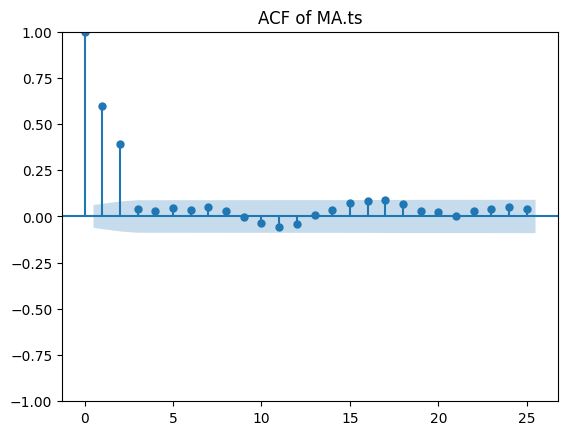

<Figure size 1200x400 with 0 Axes>

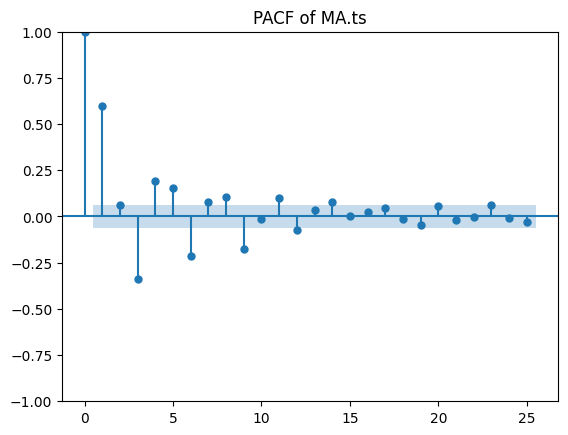

In [ ]:
# Plot the ACF and PACF of MA.ts
plt.figure(figsize=(12, 4))
plot_acf(MA_ts, lags=25)
plt.title('ACF of MA.ts')

plt.figure(figsize=(12, 4))
plot_pacf(MA_ts, lags=25)
plt.title('PACF of MA.ts')
plt.show()

<Figure size 1200x400 with 0 Axes>

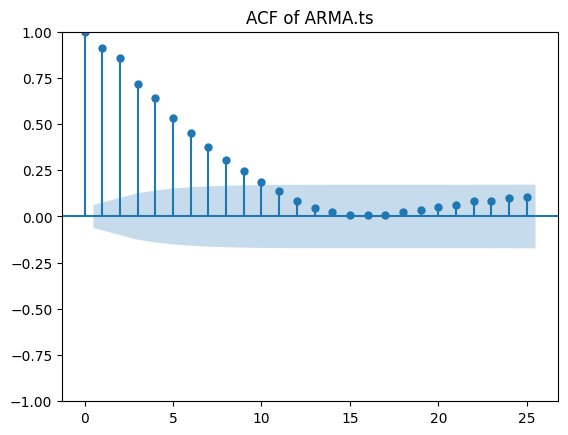

<Figure size 1200x400 with 0 Axes>

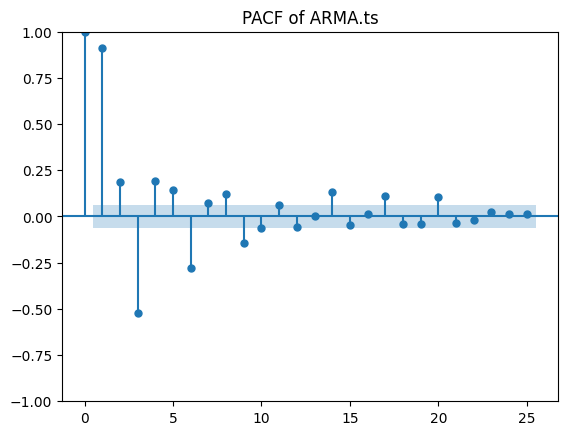

In [ ]:
# Plot the ACF and PACF of ARMA.ts
plt.figure(figsize=(12, 4))
plot_acf(ARMA_ts, lags=25)
plt.title('ACF of ARMA.ts')

plt.figure(figsize=(12, 4))
plot_pacf(ARMA_ts, lags=25)
plt.title('PACF of ARMA.ts')
plt.show()

## **Forecasting New Covid-19 Cases in the US**

In [ ]:
import pandas as pd

# Define URLs for the data files
# vaccinationfile = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
# Covid19casesfile = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
# Variantfile = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/variants/covid-variants.csv"

vaccinationfile =  'vaccinations.csv'
Covid19casesfile = 'owid-covid-data.csv'
# Variantfile = 'covid-variants.csv
# '
# Read data into data frames
vaccination_data = pd.read_csv(vaccinationfile)
Covid19cases_data = pd.read_csv(Covid19casesfile)
# Variant_data = pd.read_csv(Variantfile)

# Filter data
US_cases_data = Covid19cases_data[Covid19cases_data['iso_code'] == 'USA']
# US_Variant_data = Variant_data[(Variant_data['location'] == 'United States') & (Variant_data['variant'] == 'Delta')]

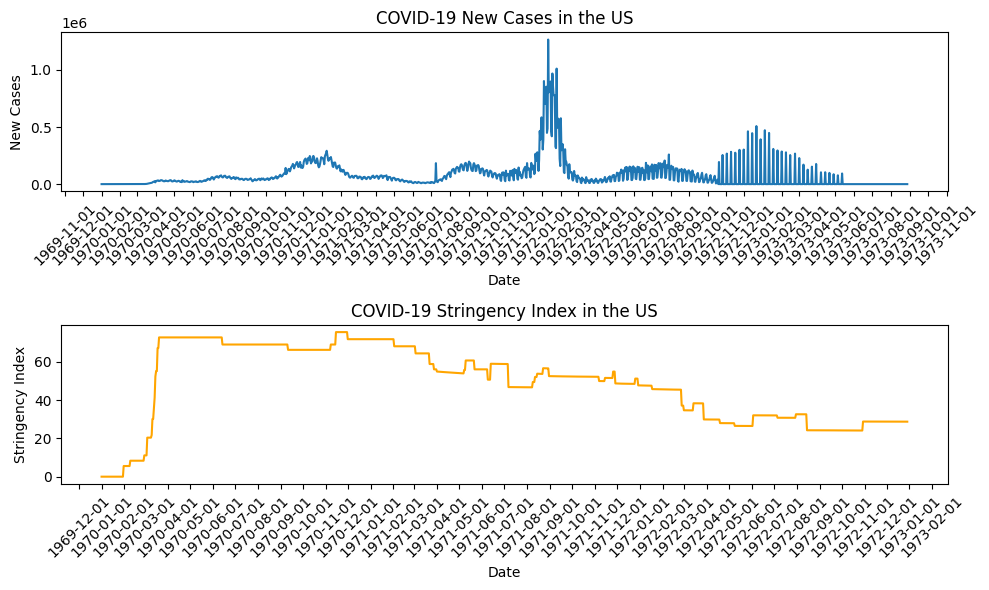

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting COVID-19 new cases and stringency index
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(US_cases_data['date'], US_cases_data['new_cases'])
plt.title('COVID-19 New Cases in the US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show X-axis labels for each month
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility

plt.subplot(2, 1, 2)
plt.plot(US_cases_data['date'], US_cases_data['stringency_index'], color='orange')
plt.title('COVID-19 Stringency Index in the US')
plt.xlabel('Date')
plt.ylabel('Stringency Index')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show X-axis labels for each month
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility

plt.tight_layout()
plt.show()

# Uncomment the following lines to plot vaccination and variant data
# plt.plot(US_vaccination_data['date'], US_vaccination_data['total_vaccinations'])
# plt.plot(US_vaccination_data['date'], US_vaccination_data['daily_vaccinations_raw'])
# plt.plot(US_Variant_data['date'], US_Variant_data['num_sequences'])

# plt.title('Vaccination and Variant Data')
# plt.xlabel('Date')
# plt.ylabel('Counts')
# plt.legend(['Total Vaccinations', 'Daily Vaccinations Raw', 'Num Sequences'])
# plt.show()


### Preprocessing

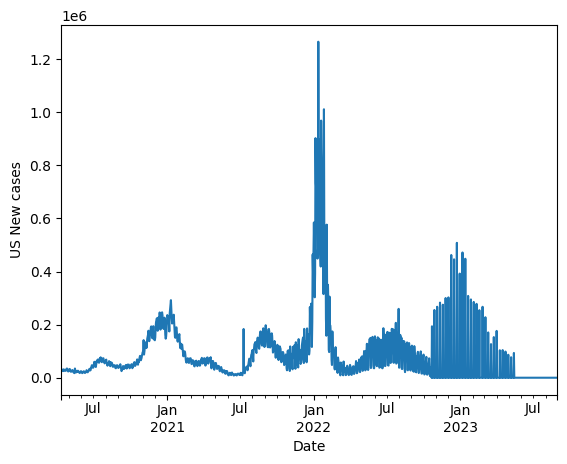

In [ ]:
# Preprocessing
USNewcase = US_cases_data['new_cases'].tail(-100) # Remove the first 100 days when the case numbers are small

# Convert to time series
USNewcase.index = pd.to_datetime(US_cases_data['date'].tail(-100))

# Plot the preprocessed data
USNewcase.plot()
plt.xlabel('Date')
plt.ylabel('US New cases')
plt.show()

We notice two properties:

'(1)  the variance increases with mean (heteroscedasticity)

'(2)  the data has cyclic pattern(seasonality)  

'We cannot directly apply the ARIMA model when either of the above behaviors shows up!

(1) Stabilizing the Variance

'To stabilized the variance, we need to transform the original data using Box-Cox Transform, also known as Power transform. It also makes the data more Gaussian   

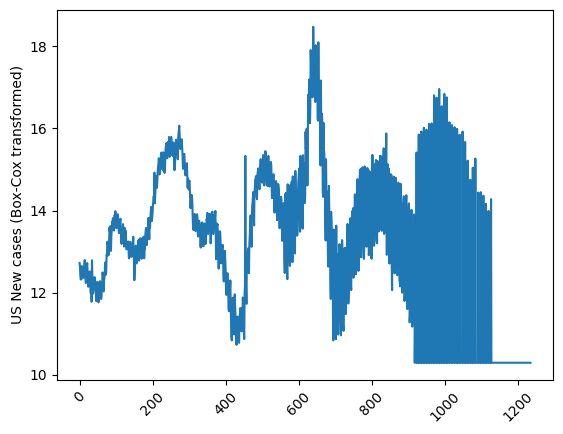

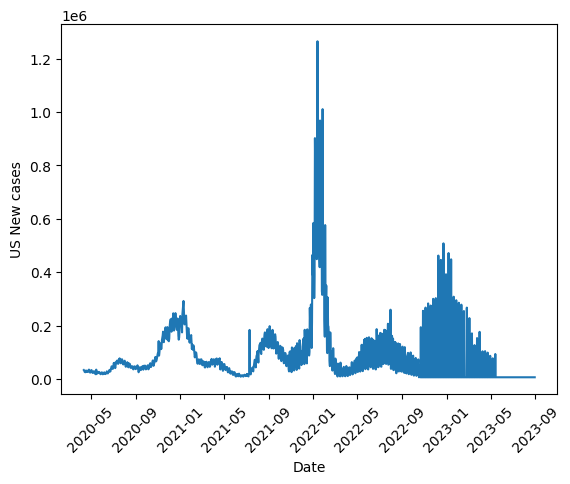

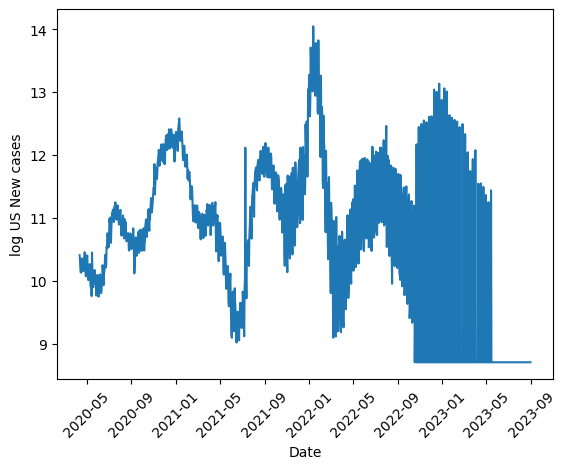

In [ ]:
from scipy import stats
import numpy as np

# Replace 0 and negative values with the smallest positive value in USNewcase
USNewcase[USNewcase <= 0] = min(USNewcase[USNewcase > 0])

# Stabilizing the Variance using Box-Cox Transform
USNewcase_lambda, USNewcase_BoxCox = stats.boxcox(USNewcase)

# Plot the transformed data
plt.figure()
plt.plot(USNewcase_lambda)
plt.ylabel('US New cases (Box-Cox transformed)')
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.plot(USNewcase)
plt.xlabel('Date')
plt.ylabel('US New cases')
plt.xticks(rotation=45)
plt.show()

logUSNewcase = np.log(USNewcase)
plt.plot(logUSNewcase)
plt.xlabel('Date')
plt.ylabel('log US New cases')
plt.xticks(rotation=45)
plt.show()

(2) Remove Seasonality through Seasonal Differencing

<Figure size 640x480 with 0 Axes>

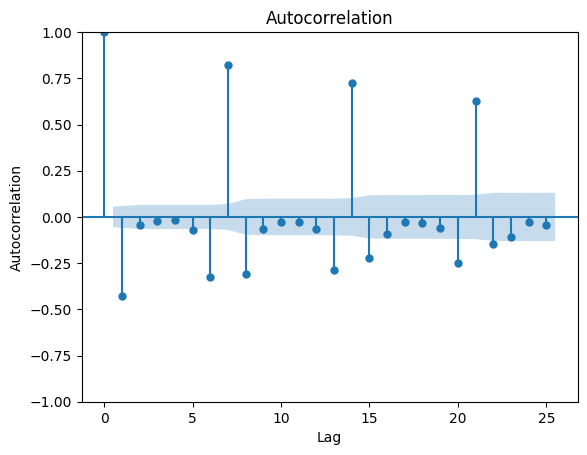

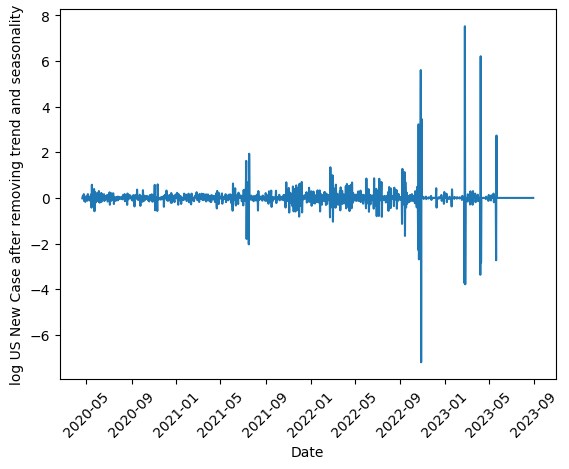

<Figure size 640x480 with 0 Axes>

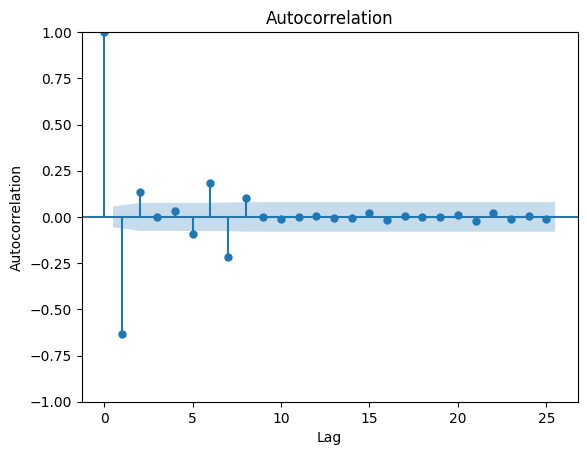

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.tools import diff

# Compute the first difference of the log transformed data
logUSNewcase_diff = diff(logUSNewcase, k_diff=1)

# Plot the autocorrelation function of the differenced data
plt.figure()
plot_acf(logUSNewcase_diff, lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Remove the seasonality using seasonal differencing
logUSNewcase_deSeasonality = diff(logUSNewcase, k_seasonal_diff=1, seasonal_periods=7)

# Plot the de-seasonalized data
plt.figure()
plt.plot(USNewcase.index[8:], logUSNewcase_deSeasonality)
plt.xlabel('Date')
plt.ylabel('log US New Case after removing trend and seasonality')
plt.xticks(rotation=45)
plt.show()


# Plot the autocorrelation function of the de-seasonalized data
plt.figure()
plot_acf(logUSNewcase_deSeasonality, lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


Check Stationarity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00


In [ ]:
# Check Stationarity
# Perform the augmented Dickey-Fuller (ADF) test to check stationarity.
# The null hypothesis assumes that the series is non-stationary.000000000000
result = adfuller(USNewcase, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
# The test suggests non-stationarity if p-value is greater than 0.05

ADF Statistic: -4.30132164159592
p-value: 0.00044187722702779367
Critical Values:
   1%, -3.435743555099632
Critical Values:
   5%, -2.8639217381867486
Critical Values:
   10%, -2.568038075665972


In [ ]:
result = adfuller(logUSNewcase_deSeasonality, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
# The test suggests stationarity if p-value is less than 0.05

ADF Statistic: -16.402043383272858
p-value: 2.632523028049768e-29
Critical Values:
   1%, -3.435739110194116
Critical Values:
   5%, -2.863919777127088
Critical Values:
   10%, -2.5680370312770515


Automatic ARIMA Modeling

In [ ]:
# Automatic ARIMA Modeling
# To begin, we use an automated algorithm to find a good model.
# However, there is no guarantee that it is the best model. So we treat it as a starting point.
model_auto = auto_arima(logUSNewcase_deSeasonality, start_p=0, start_q=0,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=4, max_q=3, # maximum p and q
                        m=1,              # frequency of series
                        d=None,           # let model determine 'd'
                        seasonal=False,   # No Seasonality
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

print(model_auto.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1927.238, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=920.309, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=808.326, Time=0.61 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=803.982, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1294.506, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=811.094, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=806.104, Time=0.68 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=806.157, Time=1.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1023.422, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=803.554, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=805.532, Time=1.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=807.076, Time=3.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=886.244, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=805.473, Time=1.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=798.127, Time=2.56 sec
 ARIMA(4,0,0)(0,0,0)[0

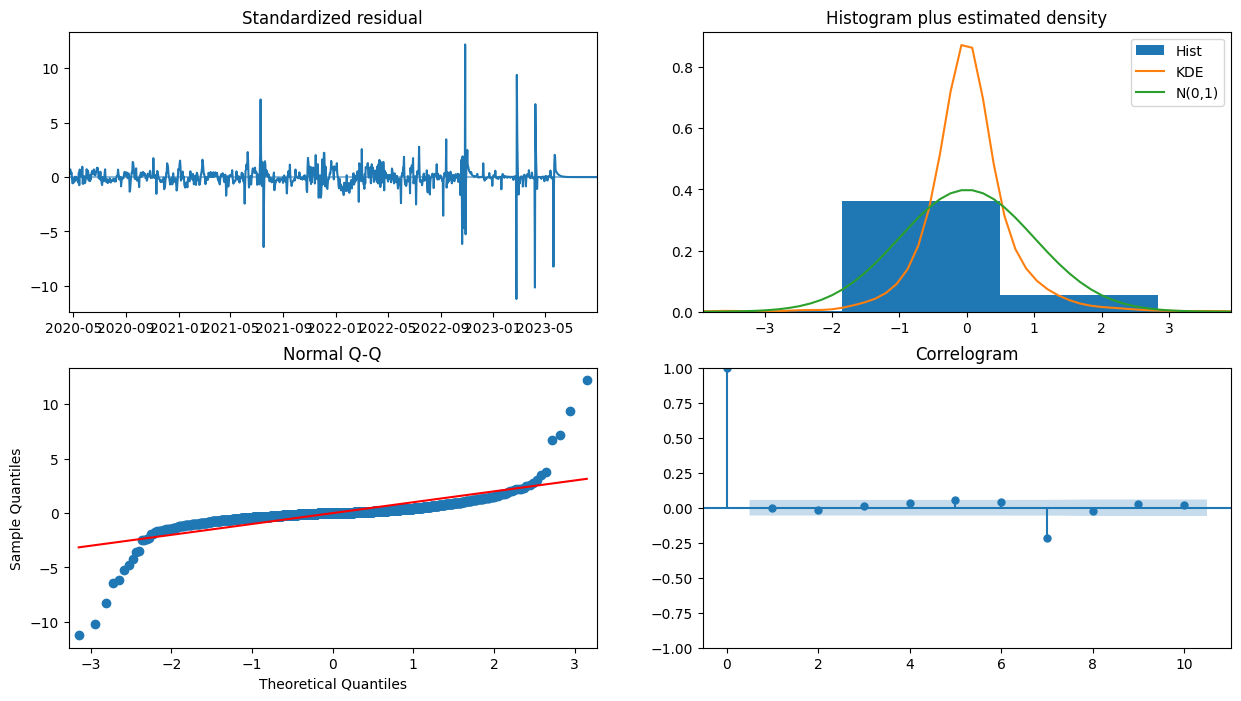

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          new_cases   No. Observations:                 1236
Model:             SARIMAX(4, 0, 1)x(0, 1, [], 7)   Log Likelihood                -383.632
Date:                            Mon, 04 Sep 2023   AIC                            779.265
Time:                                    18:27:39   BIC                            809.929
Sample:                                04-12-2020   HQIC                           790.804
                                     - 08-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3707      0.063      5.876      0.000       0.247       0.494
ar.L2          0.2451      0.015   

In [ ]:
# It suggests a ARIMA(4,0,1) model with zero mean

# Check the quality of fit. Residuals should:
# (1) not have any significant autocorrelation
# (2) follow normal distribution
# (3) have stable variance over time
model_auto.plot_diagnostics(figsize=(15,8))
plt.show()

# We can use the auto selected model to make forecasting
model = SARIMAX(logUSNewcase,
                order=(4,0,1),
                seasonal_order=(0,1,0,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

fit_yourself = model.fit(disp=False)

print(fit_yourself.summary())

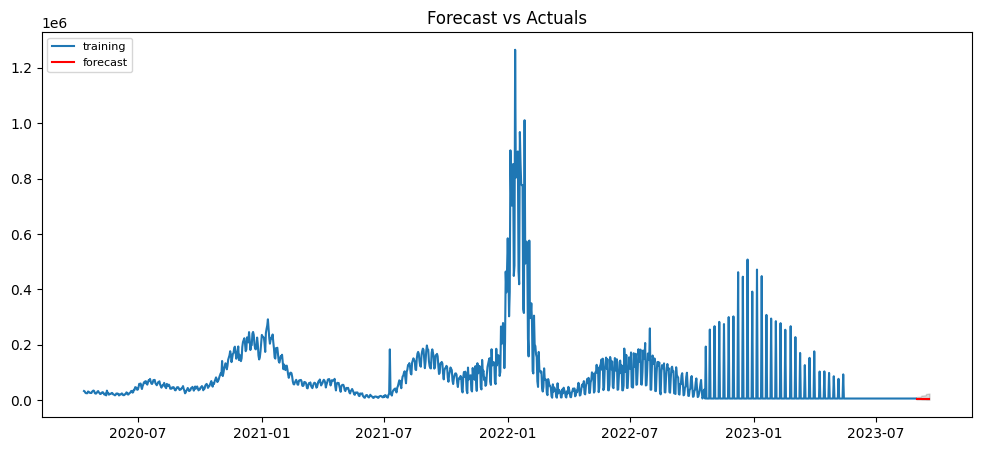

In [ ]:
# Plot the forecasting in the original scale
forecast = fit_yourself.get_forecast(steps=20)
conf_int = forecast.conf_int()

forecast_index = pd.date_range(logUSNewcase.index[-1], periods=21, freq='D').strftime('%Y-%m-%d')[1:]
forecast_series = pd.Series(np.exp(forecast.predicted_mean.values), index=forecast_index)
#
lower_series = pd.Series(np.exp(conf_int.iloc[:, 0]), index=forecast_index)
upper_series = pd.Series(np.exp(conf_int.iloc[:, 1]), index=forecast_index)
#
forecast_series.index = pd.to_datetime(forecast_series.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(USNewcase, label='training')
plt.plot(forecast_series, color = 'red', label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Improving the Automatically selected Model

'Note that the auto.arima function may not always find the model with the lowest AIC/AICc/BIC.
'To improve the existing model, we may explore other models manually to see if one could yield a lower criterion than the existing model.

'You can also split the time series into a training set and a validation set, and then compare the MSE in the validation set to select the best model.  
'Another opportunity of improvement is carefully selecting the length of your training set. Using more recent data for training can leads to better forecasting if your historical data has a structural change that makes earlier data obsolete.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                                    SARIMAX Results                                     
Dep. Variable:                        new_cases   No. Observations:                 1236
Model:             ARIMA(4, 0, 2)x(0, 1, [], 7)   Log Likelihood                -378.255
Date:                          Mon, 04 Sep 2023   AIC                            770.510
Time:                                  18:35:31   BIC                            806.308
Sample:                              04-12-2020   HQIC                           783.979
                                   - 08-30-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3316      0.118     -2.820      0.005      -0.562      -0.101
ar.L2          0.5957      0.088      6.735      0.

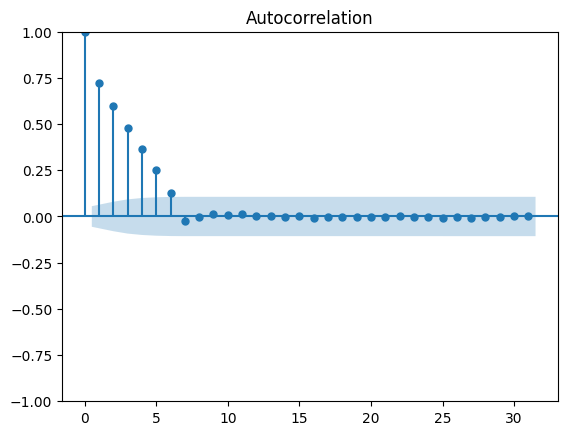

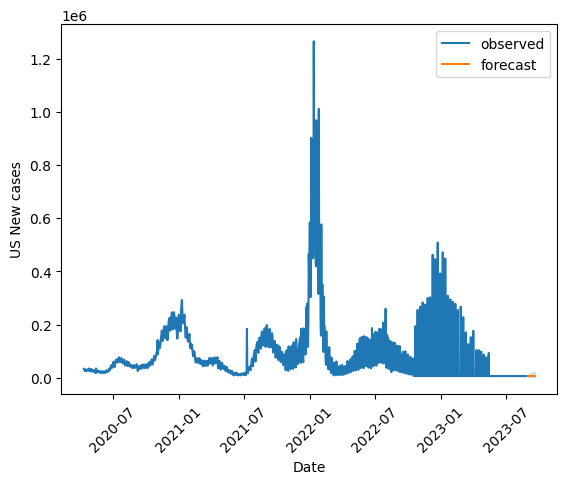

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

#-------------Improving the Automatically selected Model -------------------
# Fit an alternative model
fit_alternative1 = ARIMA(logUSNewcase, order=(4,0,2), seasonal_order=(0,1,0,7)).fit()

print(fit_alternative1.summary())

# Check residuals
residuals = fit_alternative1.resid
plot_acf(residuals)
plt.show()

# Forecast
fc1 = fit_alternative1.get_forecast(steps=20)
fc1_index = USNewcase.index[-1] + pd.DateOffset(1) + pd.to_timedelta(np.arange(20), 'D')
fc1_series = pd.Series(fc1.predicted_mean, index=fc1_index)

# Plot the forecast
plt.figure()
plt.plot(USNewcase.index, np.exp(logUSNewcase), label='observed')
plt.plot(fc1_series.index, np.exp(fc1_series), label='forecast')
plt.fill_between(fc1_series.index, np.exp(fc1_series - 1.96*fc1.se_mean), np.exp(fc1_series + 1.96*fc1.se_mean), color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('US New cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()


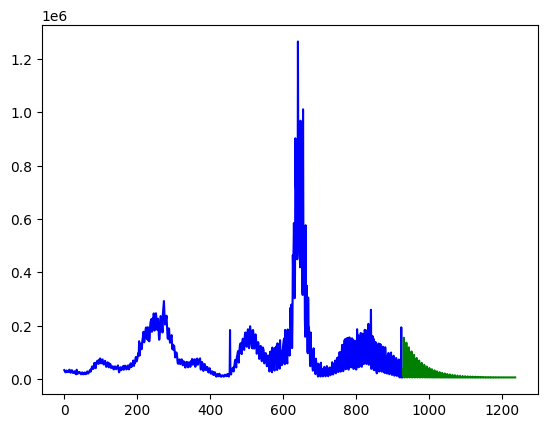

In [ ]:
import pmdarima as pm
from pmdarima import model_selection
import matplotlib.pyplot as plt

# Split data into train and test sets
train, test = model_selection.train_test_split(USNewcase, train_size=0.75)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=7)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(USNewcase.shape[0])
plt.plot(x[:len(train)], train, c='blue')
plt.plot(x[len(train):], forecasts, c='green')
plt.show()

## **ARIMA with Covariates ("dynamic regression")**

In [ ]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
insurance = pd.read_csv("insurance.csv", index_col=None)
# Drop the first column
insurance.drop(insurance.columns[0], axis=1, inplace=True)
insurance

,Quotes,TV.advert
0,12.97065,7.212725
1,15.38714,9.443570
2,13.22957,7.534250
3,12.97065,7.212725
4,15.38714,9.443570
5,11.72288,6.415215
6,10.06177,5.806990
7,10.82279,6.203600
8,13.28707,7.586430
9,14.57832,8.004935


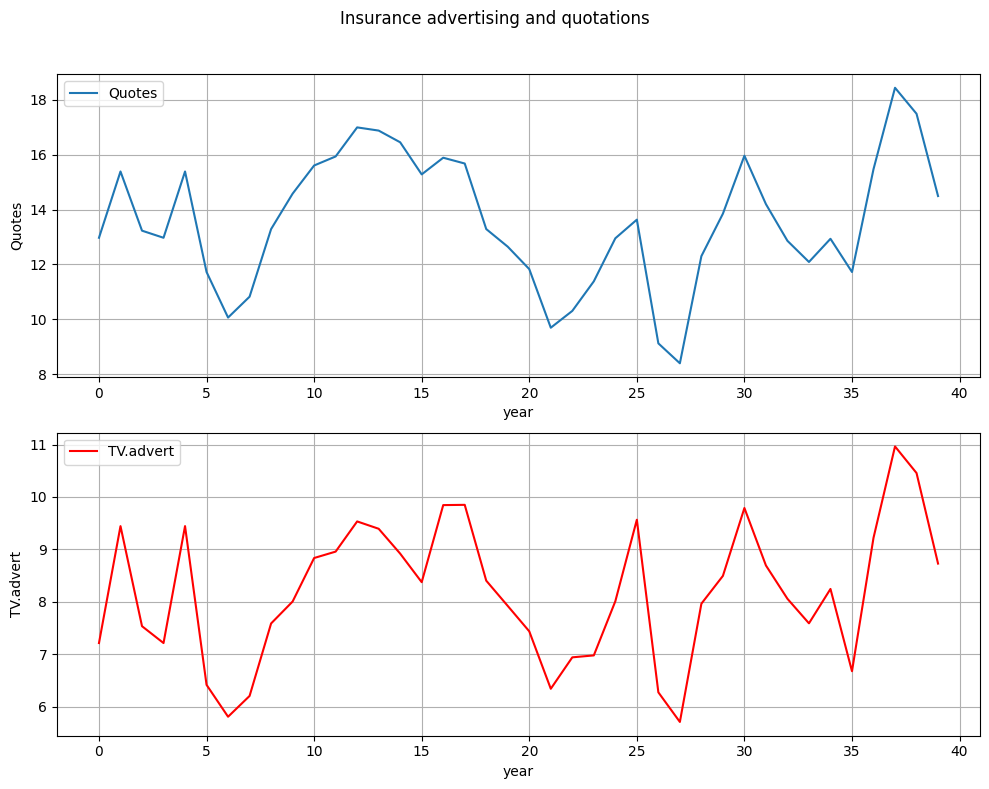

In [ ]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting the first column in the first subplot
axes[0].plot(insurance.index, insurance['Quotes'], label=insurance.columns[0])
axes[0].set_xlabel('year')
axes[0].set_ylabel('Quotes')
axes[0].grid(True)
axes[0].legend()

# Plotting the second column in the second subplot
axes[1].plot(insurance.index, insurance['TV.advert'], label=insurance.columns[1], color='r')
axes[1].set_xlabel('year')
axes[1].set_ylabel('TV.advert')
axes[1].grid(True)
axes[1].legend()

# Main title for the entire figure
fig.suptitle('Insurance advertising and quotations')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Adjusting the layout to make sure titles don't overlap
plt.show()

In [ ]:
# Lagged predictors. Test 0, 1, 2 or 3 lags.
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# Lagged predictors.
Advert = pd.DataFrame({
    "AdLag0": insurance.iloc[:, 1],
    "AdLag1": insurance.iloc[:, 1].shift(1),
    "AdLag2": insurance.iloc[:, 1].shift(2),
    "AdLag3": insurance.iloc[:, 1].shift(3)
})

Advert



,AdLag0,AdLag1,AdLag2,AdLag3
0,7.212725,NaN,NaN,NaN
1,9.443570,7.212725,NaN,NaN
2,7.534250,9.443570,7.212725,NaN
3,7.212725,7.534250,9.443570,7.212725
4,9.443570,7.212725,7.534250,9.443570
5,6.415215,9.443570,7.212725,7.534250
6,5.806990,6.415215,9.443570,7.212725
7,6.203600,5.806990,6.415215,9.443570
8,7.586430,6.203600,5.806990,6.415215
9,8.004935,7.586430,6.203600,5.806990


In [ ]:
# Choose optimal lag length for advertising based on AIC
# Restrict data so models use same fitting period
models = {}
for i in range(1, 5):
    model = ARIMA(insurance['Quotes'][3:40], order=(0, 0, 0), exog=Advert.iloc[3:40, :i])
    results = model.fit()
    models[i] = results
    print(f"Model {i} AIC: {results.aic}")
    print(f"Model {i} BIC: {results.bic}")

Model 1 AIC: 101.62405382590012
Model 1 BIC: 106.4568075638328
Model 2 AIC: 102.8320952089351
Model 2 BIC: 109.275766859512
Model 3 AIC: 104.79380662228338
Model 3 BIC: 112.8483961855045
Model 4 AIC: 106.350182018703
Model 4 BIC: 116.01568949456833


In [ ]:
#Best fit (as per AIC and BIC) is with all data (1:2), so the final model becomes
# Identify rows with NaN values in specific columns
nan_rows = Advert[['AdLag0', 'AdLag1']].isna().any(axis=1)

# Filter out those rows
quotes_clean = insurance['Quotes'][~nan_rows]
advert_clean = Advert[~nan_rows]

# Ensure that the cleaned data has the same shape
assert quotes_clean.shape[0] == advert_clean.shape[0], "Data shapes don't match"

# Fit the ARIMA model with the cleaned data
final_model = ARIMA(quotes_clean, order=(3, 0, 0), exog=advert_clean.iloc[:, :2])
final_results = final_model.fit()

print(final_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Quotes   No. Observations:                   39
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -23.891
Date:                Wed, 06 Sep 2023   AIC                             61.782
Time:                        18:41:28   BIC                             73.427
Sample:                             0   HQIC                            65.960
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0413      1.094      1.866      0.062      -0.103       4.186
AdLag0         1.2563      0.076     16.567      0.000       1.108       1.405
AdLag1         0.1624      0.072      2.262      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


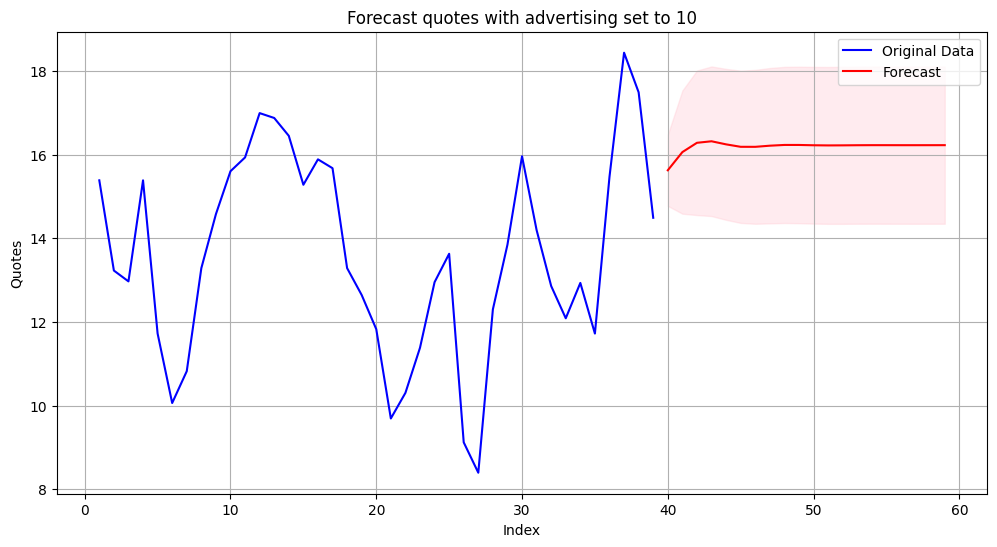

In [ ]:
# forecast insurance quotes with advertising = 10
forecast_values = 10
exog_forecast = pd.DataFrame({
    'AdLag0': [forecast_values] * 20,
    'AdLag1': [Advert['AdLag0'].iloc[-1]] + [forecast_values] * 19
})

forecast = final_results.get_forecast(steps=20, exog=exog_forecast)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot Original Data & Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(quotes_clean.index, quotes_clean, label="Original Data", color='blue')
plt.plot(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), forecast_mean, label="Forecast", color='red')
plt.fill_between(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast quotes with advertising set to 10")
plt.xlabel("Index")
plt.ylabel("Quotes")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


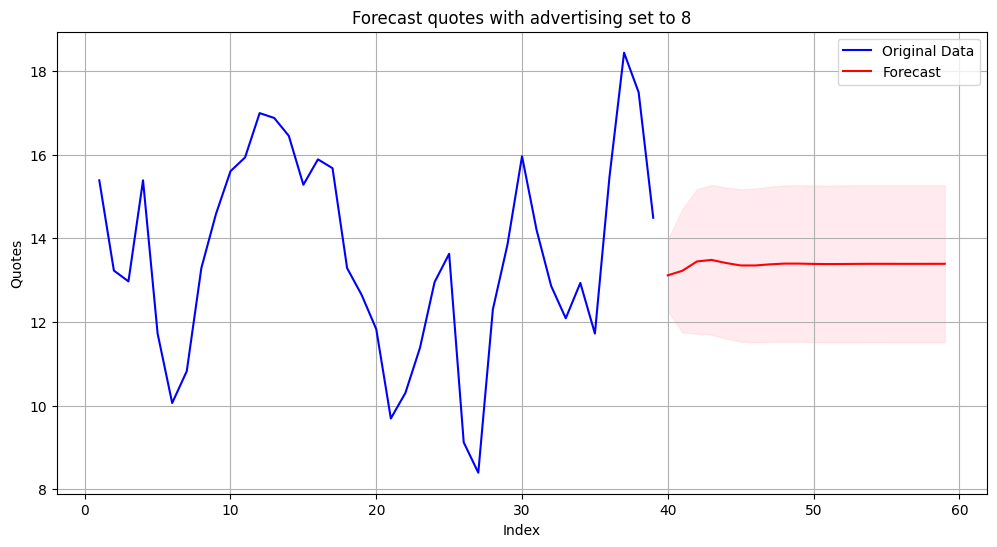

In [ ]:
# forecast insurance quotes with advertising = 8
forecast_values = 8
exog_forecast = pd.DataFrame({
    'AdLag0': [forecast_values] * 20,
    'AdLag1': [Advert['AdLag0'].iloc[-1]] + [forecast_values] * 19
})

forecast = final_results.get_forecast(steps=20, exog=exog_forecast)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot Original Data & Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(quotes_clean.index, quotes_clean, label="Original Data", color='blue')
plt.plot(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), forecast_mean, label="Forecast", color='red')
plt.fill_between(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast quotes with advertising set to 8")
plt.xlabel("Index")
plt.ylabel("Quotes")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


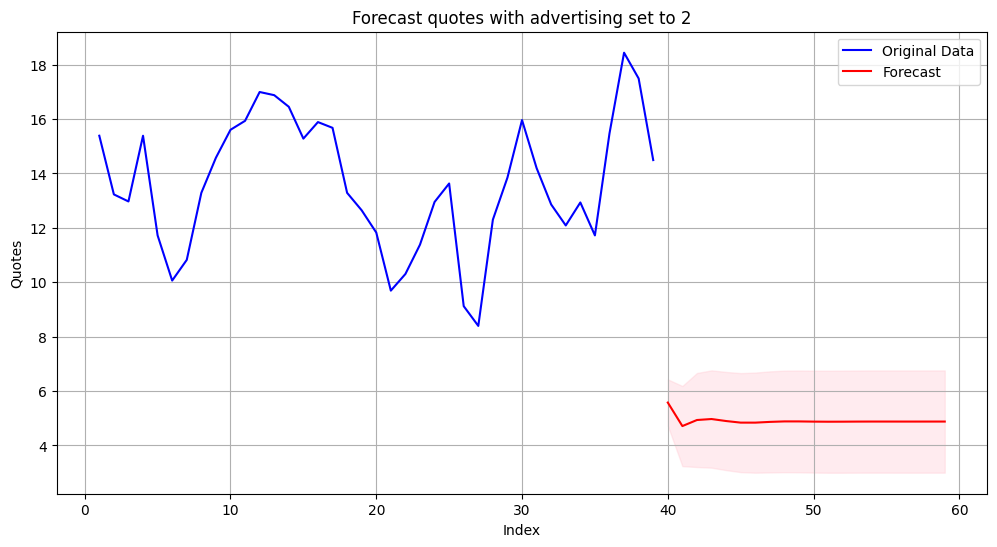

In [ ]:
# forecast insurance quotes with advertising = 2
forecast_values = 2
exog_forecast = pd.DataFrame({
    'AdLag0': [forecast_values] * 20,
    'AdLag1': [Advert['AdLag0'].iloc[-1]] + [forecast_values] * 19
})

forecast = final_results.get_forecast(steps=20, exog=exog_forecast)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot Original Data & Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(quotes_clean.index, quotes_clean, label="Original Data", color='blue')
plt.plot(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), forecast_mean, label="Forecast", color='red')
plt.fill_between(np.arange(quotes_clean.index[-1] + 1, quotes_clean.index[-1] + 21), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast quotes with advertising set to 2")
plt.xlabel("Index")
plt.ylabel("Quotes")
plt.legend()
plt.grid(True)
plt.show()